In [5]:
import sys
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline')
sys.path.append(r'C:\Users\tinc9\Documents\CNRS-offline\quantum_main_project')
import lpfet
import numpy as np
import matplotlib.pyplot as plt
import essentials
import seaborn as sns
import matplotlib.colors as mcolors

# 6 site ring with 2 atoms on opposite site

```
  o -- o
 /      \
x        x   
 \      /
  o -- o
  
```
Potential on sites are +i for o and -i for x

# Reset of Hxc potential each cycle

In [36]:
x = np.arange(0.05, 2.1, 0.2)
mol1 = lpfet.Molecule(6,6, '_6ring2sites_v2')
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
first = True
for i in x:
    if not first:
        mol1.clear_object("_6ring2sites_v2")
    first = False
    print(i, i/max(x))
    pmv = i
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
         4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
    mol1.self_consistent_loop(num_iter=20, tolerance=0.000001)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())
    


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05 0.02439024390243903
managed to get E^2=0.00032364994881900857 with mu_imp=-0.400429577509556
managed to get E^2=8.630457415395408e-05 with mu_imp=-1.2383437993032687
Loop 0-----
managed to get E^2=0.0011065678333368283 with mu_imp=-1.1794812490404103
managed to get E^2=0.00012674346859400514 with mu_imp=-1.1912346294936047
Loop 1-----
managed to get E^2=0.0007932854272732235 with mu_imp=-0.7118700477444513
managed to get E^2=0.00033174498021402976 with mu_imp=-1.202038089502506
Loop 2-----
managed to get E^2=0.0001177749730752312 with mu_imp=-0.9640393991944873
managed to get E^2=2.6799410027520096e-08 with mu_imp=-1.202038089502506
Loop 3-----
managed to get E^2=0.0008818753696501404 with mu_imp=-0.9640393991944873
managed to get E^2=0.0001001178499736619 with mu_imp=-1.202038089502506
Loop 4-----
managed to get E^2=0.0008818753696501404 with mu_imp=-0.9640393991944873
managed to get E^2

results/2022_02_10_19_14_6ring2sites_v2_molecule.png


C:\Users\tinc9\Documents\CNRS-offline\quantum_main_project\LPFET\lpfet.py:290: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


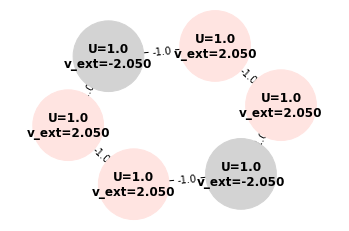

In [3]:
mol1.plot_hubbard_molecule()

In [40]:
for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y = np.array(y)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple)

Text(0, 0.5, 'occupation of site 0 and 3')

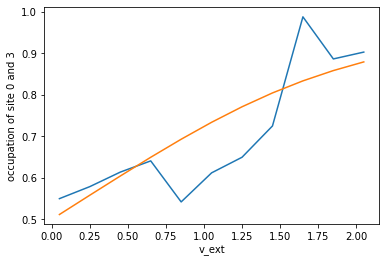

In [42]:
plt.plot(x, y_simple[:, 0])
plt.plot(x, y_ref[:, 0])
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")

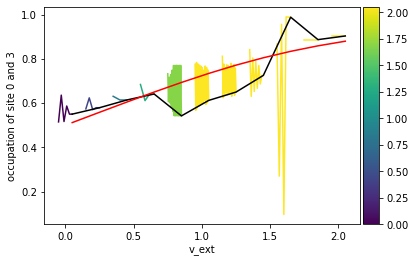

In [67]:
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color=colors[x_i])

plt.plot(x, y_simple[:, 0], c='k')
plt.plot(x, y_ref[:, 0], c='r')
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
plt.gcf().add_axes(ax_cb)

plt.show()

# Not reseting external potential

In [73]:
x = np.arange(0.05, 2.1, 0.2)
mol1 = lpfet.Molecule(6,6, '_6ring2sites_v2')
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
y = []
y_simple = []
y_ref = []
for i in x:
    mol1.density_progress = []
    print(i, i/max(x))
    pmv = i
    t, v_ext, u = lpfet.generate_from_graph(
        {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
         4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
        {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
    mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
    mol1.self_consistent_loop(num_iter=20, tolerance=0.000001)
    
    y.append(mol1.density_progress)
    y_simple.append(mol1.n_ks)
    y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
    y_ab /= 2
    y_ref.append(y_ab.diagonal())
    


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
0.05 0.02439024390243903
managed to get E^2=0.00032364994881900857 with mu_imp=-0.400429577509556
managed to get E^2=8.630457415395408e-05 with mu_imp=-1.2383437993032687
Loop 0-----
managed to get E^2=0.0011065678333368283 with mu_imp=-1.1794812490404103
managed to get E^2=0.00012674346859400514 with mu_imp=-1.1912346294936047
Loop 1-----
managed to get E^2=0.0007932854272732235 with mu_imp=-0.7118700477444513
managed to get E^2=0.00033174498021402976 with mu_imp=-1.202038089502506
Loop 2-----
managed to get E^2=0.0001177749730752312 with mu_imp=-0.9640393991944873
managed to get E^2=2.6799410027520096e-08 with mu_imp=-1.202038089502506
Loop 3-----
managed to get E^2=0.0008818753696501404 with mu_imp=-0.9640393991944873
managed to get E^2=0.0001001178499736619 with mu_imp=-1.202038089502506
Loop 4-----
managed to get E^2=0.0008818753696501404 with mu_imp=-0.9640393991944873
managed to get E^2

In [76]:
for i in range(len(y)):
    y[i] = np.array(y[i], dtype=float)
y_ref = np.array(y_ref)
y_simple = np.array(y_simple)

Text(0, 0.5, 'occupation of site 0 and 3')

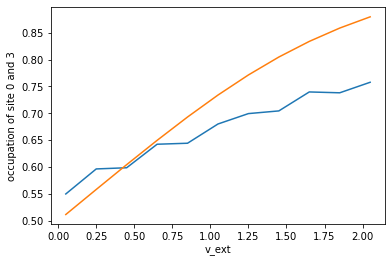

In [77]:
plt.plot(x, y_simple[:, 0])
plt.plot(x, y_ref[:, 0])
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")

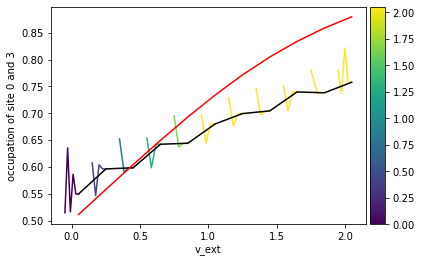

In [78]:
colors = plt.cm.viridis(np.linspace(0, max(x), len(x)))
norm = mpl.colors.Normalize(vmin=0, vmax=max(x))
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
for x_i, regime in enumerate(y):
    mu_ext = x[x_i]
    length = len(regime)
    x_data = np.linspace(-0.1, 0, length) + mu_ext
    plt.plot(x_data, regime[:,0], color=colors[x_i])

plt.plot(x, y_simple[:, 0], c='k')
plt.plot(x, y_ref[:, 0], c='r')
plt.xlabel("v_ext")
plt.ylabel("occupation of site 0 and 3")

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)    
cb1 = mpl.colorbar.ColorbarBase(ax_cb, cmap=mpl.cm.viridis, orientation='vertical', norm=norm)
plt.gcf().add_axes(ax_cb)

plt.show()

# Finding stability of convergence based on initial parameters of Hxc chemical potential

## v_ext = +- 1.0

In [42]:
x = np.arange(-1.5, 1.6, 0.3)
mol1 = lpfet.Molecule(6,6, '_6ring2sites_v3')
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
n = []
n_ref = []
iter_num = []
pmv = 1
first = True
for i in x:
    n.append([])
    n_ref.append([])
    iter_num.append([])
    for j in x:
        if not first:
            mol1.clear_object("_6ring2sites_v2")
        first = False
        print(i, j, 100 * i/len(x))
        t, v_ext, u = lpfet.generate_from_graph(
            {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
             4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
            {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
        mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
        mol1.mu_hxc = np.array([i, j, j, i, j, j])
        iter_num[-1].append(mol1.self_consistent_loop(num_iter=20, tolerance=0.000001))

        n[-1].append(mol1.n_ks[0])
        y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
        y_ab /= 2
        n_ref[-1].append(y_ab.diagonal()[0])


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
-1.5 -1.5 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, FCI densities (per spin): [0.72411653 0.38794174 0.38794174 0.72411653 0.38794174 0.38794174]
-1.5 -1.2 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, FCI densities (per spin): [0.72411653 0.38794174 0.38794174 0.72411653 0.38794174 0.38794174]
-1.5 -0.8999999999999999 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, FCI densities (per spin): [0.72411653 0.38794174 0.38794174 0.72411653 0.38794174 0.38794174]
-1.5 -0.5

' '

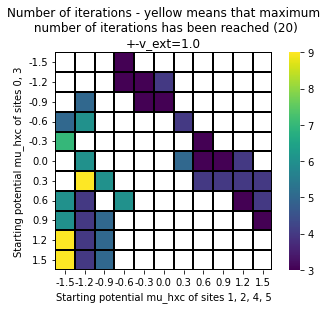

In [44]:

iter_num_exaggerated = np.array(iter_num).copy() + 1
# iter_num_exaggerated[iter_num_exaggerated == 20 ] = np.nan
# plt.imshow(iter_num_exaggerated, cmap='viridis', interpolation='nearest')
# plt.colorbar()
sns.heatmap(iter_num_exaggerated, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='viridis');
plt.title('Number of iterations - yellow means that maximum\n number of iterations has been reached (20)\n+-v_ext=1.0')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

In [45]:
iter_num_exaggerated

array([[20, 20, 20,  3, 20, 20, 20, 20, 20, 20, 20],
       [20, 20, 20,  3,  3,  4, 20, 20, 20, 20, 20],
       [20,  5, 20, 20,  3,  3, 20, 20, 20, 20, 20],
       [ 5,  6, 20, 20, 20, 20,  4, 20, 20, 20, 20],
       [ 7, 20, 20, 20, 20, 20, 20,  3, 20, 20, 20],
       [20,  6, 20, 20, 20, 20,  5,  3,  3,  4, 20],
       [20,  9,  6, 20, 20, 20, 20,  4,  4,  4,  4],
       [ 6,  4, 20,  6, 20, 20, 20, 20, 20,  3,  4],
       [ 6,  4,  5, 20, 20, 20, 20, 20, 20, 20,  3],
       [ 9,  4,  5, 20, 20, 20, 20, 20, 20, 20, 20],
       [ 9,  4,  5, 20, 20, 20, 20, 20, 20, 20, 20]])

  -0.284   -0.138   -0.133   -0.064   +0.023   +0.023   +0.036   +0.018   +0.134   +0.134   +0.135
  -0.124   -0.124   -0.116   -0.040   -0.052   -0.061   +0.035   +0.035   +0.024   +0.134   +0.134
  -0.116   -0.702   -0.116   -0.116   -0.043   -0.032   +0.017   +0.033   +0.035   +0.025   +0.134
  -0.346   -0.689   -0.130   -0.116   -0.143   -0.133   -0.058   +0.035   +0.033   +0.017   +0.025
  -0.713   -0.284   -0.124   -0.116   -0.130   -0.135   -0.135   -0.058   +0.049   +0.035   +0.036
  +0.134   +0.269   -0.134   -0.124   -0.116   -0.129   -0.061   -0.052   -0.048   -0.062   +0.039
  +0.134   +0.265   -0.702   -0.134   -0.124   -0.116   -0.136   -0.044   -0.053   -0.062   -0.062
  -0.717   -0.067   -0.284   +0.273   -0.124   -0.123   -0.116   -0.135   -0.134   -0.039   -0.061
  -0.717   -0.067   -0.062   -0.285   -0.134   -0.124   -0.117   -0.134   -0.135   -0.129   -0.066
  +0.266   -0.067   -0.055   -0.285   -0.285   -0.284   -0.124   -0.116   -0.134   -0.132   -0.133
  +0.271  

' '

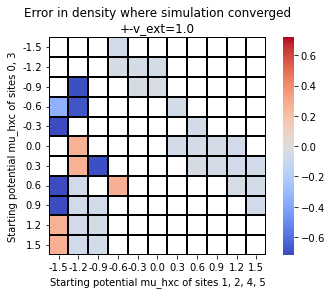

In [56]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='coolwarm', norm=mcolors.CenteredNorm());
plt.title('Error in density where simulation converged\n+-v_ext=1.0')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

  -0.284   -0.138   -0.133   -0.064   +0.023   +0.023   +0.036   +0.018   +0.134   +0.134   +0.135
  -0.124   -0.124   -0.116   -0.040   -0.052   -0.061   +0.035   +0.035   +0.024   +0.134   +0.134
  -0.116   -0.702   -0.116   -0.116   -0.043   -0.032   +0.017   +0.033   +0.035   +0.025   +0.134
  -0.346   -0.689   -0.130   -0.116   -0.143   -0.133   -0.058   +0.035   +0.033   +0.017   +0.025
  -0.713   -0.284   -0.124   -0.116   -0.130   -0.135   -0.135   -0.058   +0.049   +0.035   +0.036
  +0.134   +0.269   -0.134   -0.124   -0.116   -0.129   -0.061   -0.052   -0.048   -0.062   +0.039
  +0.134   +0.265   -0.702   -0.134   -0.124   -0.116   -0.136   -0.044   -0.053   -0.062   -0.062
  -0.717   -0.067   -0.284   +0.273   -0.124   -0.123   -0.116   -0.135   -0.134   -0.039   -0.061
  -0.717   -0.067   -0.062   -0.285   -0.134   -0.124   -0.117   -0.134   -0.135   -0.129   -0.066
  +0.266   -0.067   -0.055   -0.285   -0.285   -0.284   -0.124   -0.116   -0.134   -0.132   -0.133
  +0.271  

' '

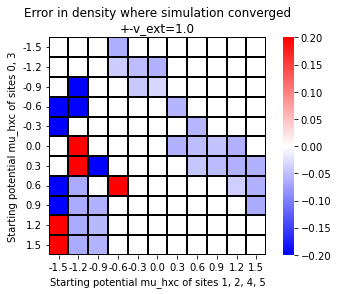

In [62]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='bwr', norm=mcolors.CenteredNorm(halfrange=0.2));
plt.title('Error in density where simulation converged\n+-v_ext=1.0')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

## v_ext = +- 0.5

In [66]:
x = np.arange(-1.5, 1.6, 0.3)
mol1 = lpfet.Molecule(6,6, "_6ring2sites_vext-0.5")
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
n = []

iter_num = []
pmv = 0.5
t, v_ext, u = lpfet.generate_from_graph(
            {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
             4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
            {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
first = True
for i_id, i in enumerate(x):
    n.append([])
    iter_num.append([])
    for j in x:
        if not first:
            mol1.clear_object("_6ring2sites_vext-0.5")
        first = False
        print(i, j, 100 * i_id/len(x))
        
        mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
        mol1.mu_hxc = np.array([i, j, j, i, j, j])
        iter_num[-1].append(mol1.self_consistent_loop(num_iter=20, tolerance=0.000001))
        n[-1].append(mol1.n_ks[0])

y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
y_ab /= 2
n_ref = y_ab.diagonal()[0]


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
-1.5 -1.5 -13.636363636363637
Loop 0, Loop 1, Loop 2, -1.5 -1.2 -13.636363636363637
Loop 0, Loop 1, Loop 2, -1.5 -0.8999999999999999 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, -1.5 -0.5999999999999999 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, -1.5 -0.2999999999999998 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, -1.5 2.220446049250313e-16 -13.636363636363637
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, Loop 10, Loop 11, Loop 12, Loop 13, Loop 14, Loop 15, Loop 16, Loop 17, Loop 18, Loop 19, -1.5 0.30000000000000027 -13.636363636363637
Loop 0, Loop 1, Loop 

' '

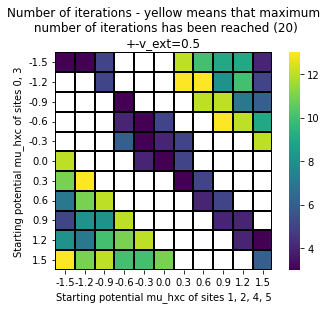

In [68]:
iter_num_exaggerated = np.array(iter_num).copy() + 1
# iter_num_exaggerated[iter_num_exaggerated == 20 ] = np.nan
# plt.imshow(iter_num_exaggerated, cmap='viridis', interpolation='nearest')
# plt.colorbar()
sns.heatmap(iter_num_exaggerated, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='viridis');
plt.title(f'Number of iterations - yellow means that maximum\n number of iterations has been reached (20)\n+-v_ext={pmv:.1f}')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

  -0.003   +0.008   +0.012   +0.180   +0.181   +0.182   +0.370   +0.367   +0.377   -0.587   -0.612
  -0.192   -0.191   -0.008   +0.180   +0.181   +0.181   +0.381   -0.587   -0.612   +0.368   +0.373
  -0.192   -0.191   -0.192   -0.011   +0.179   +0.181   +0.182   +0.370   +0.373   +0.375   +0.372
  -0.193   -0.192   -0.190   +0.008   -0.006   +0.010   +0.181   +0.181   -0.588   +0.369   +0.378
  -0.194   -0.193   -0.192   +0.011   -0.007   -0.007   +0.011   +0.181   +0.181   +0.182   +0.373
  +0.381   -0.194   -0.193   -0.192   +0.013   -0.005   -0.008   +0.179   +0.180   +0.181   +0.182
  +0.367   +0.371   -0.194   -0.193   -0.192   -0.192   +0.002   -0.007   +0.179   +0.181   +0.181
  +0.372   +0.370   +0.378   -0.194   -0.193   -0.192   -0.192   +0.009   +0.011   +0.180   +0.180
  -0.612   +0.376   +0.377   +0.373   -0.193   -0.193   -0.192   -0.192   +0.009   +0.014   +0.180
  +0.374   +0.373   -0.586   +0.367   -0.587   -0.193   -0.193   -0.192   -0.192   +0.010   +0.015
  +0.367  

' '

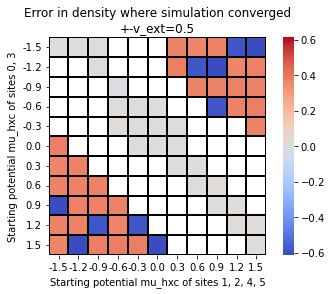

In [70]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='coolwarm', norm=mcolors.CenteredNorm());
plt.title(f'Error in density where simulation converged\n+-v_ext={pmv}')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

  -0.003   +0.008   +0.012   +0.180   +0.181   +0.182   +0.370   +0.367   +0.377   -0.587   -0.612
  -0.192   -0.191   -0.008   +0.180   +0.181   +0.181   +0.381   -0.587   -0.612   +0.368   +0.373
  -0.192   -0.191   -0.192   -0.011   +0.179   +0.181   +0.182   +0.370   +0.373   +0.375   +0.372
  -0.193   -0.192   -0.190   +0.008   -0.006   +0.010   +0.181   +0.181   -0.588   +0.369   +0.378
  -0.194   -0.193   -0.192   +0.011   -0.007   -0.007   +0.011   +0.181   +0.181   +0.182   +0.373
  +0.381   -0.194   -0.193   -0.192   +0.013   -0.005   -0.008   +0.179   +0.180   +0.181   +0.182
  +0.367   +0.371   -0.194   -0.193   -0.192   -0.192   +0.002   -0.007   +0.179   +0.181   +0.181
  +0.372   +0.370   +0.378   -0.194   -0.193   -0.192   -0.192   +0.009   +0.011   +0.180   +0.180
  -0.612   +0.376   +0.377   +0.373   -0.193   -0.193   -0.192   -0.192   +0.009   +0.014   +0.180
  +0.374   +0.373   -0.586   +0.367   -0.587   -0.193   -0.193   -0.192   -0.192   +0.010   +0.015
  +0.367  

' '

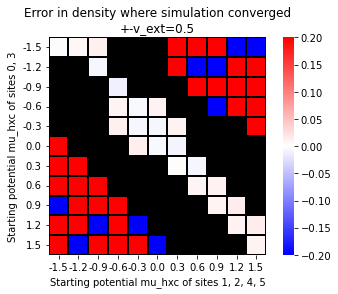

In [82]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
fig, ax = plt.subplots(1,1)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='bwr', norm=mcolors.CenteredNorm(halfrange=0.2));
plt.title(f'Error in density where simulation converged\n+-v_ext={pmv}')
ax.set_facecolor('k')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

# v_ext = +- 2

In [83]:
x = np.arange(-1.5, 1.6, 0.3)
mol1 = lpfet.Molecule(6,6, "_6ring2sites_vext-2")
mol_full = lpfet.class_Quant_NBody.QuantNBody(6, 6)
mol_full.build_operator_a_dagger_a()
n = []

iter_num = []
pmv = 2
t, v_ext, u = lpfet.generate_from_graph(
            {0: {'v': -pmv, 'U': 1}, 1: {'v': pmv, 'U': 1}, 2: {'v': pmv, 'U': 1}, 3: {'v': -pmv, 'U': 1},
             4: {'v': pmv, 'U': 1}, 5: {'v': pmv, 'U': 1}},
            {(0, 1): 1, (1, 2): 1, (2, 3): 1, (3, 4): 1, (4, 5): 1, (0, 5): 1})
first = True
for i_id, i in enumerate(x):
    n.append([])
    iter_num.append([])
    for j in x:
        if not first:
            mol1.clear_object("_6ring2sites_vext-2")
        first = False
        print(i, j, 100 * i_id/len(x))
        
        mol1.add_parameters(u, t, v_ext, [[0, 3], [1, 2, 4, 5]])
        mol1.mu_hxc = np.array([i, j, j, i, j, j])
        iter_num[-1].append(mol1.self_consistent_loop(num_iter=20, tolerance=0.000001))
        n[-1].append(mol1.n_ks[0])

y_ab, rest =mol1.compare_densities_FCI(pass_object=mol_full)
y_ab /= 2
n_ref = y_ab.diagonal()[0]


	 ====  The matrix form of a^a is built  ====

	 ====  The matrix form of a^a is built  ====
-1.5 -1.5 0.0
Loop 0, Loop 1, -1.5 -1.2 0.0
Loop 0, Loop 1, -1.5 -0.8999999999999999 0.0
Loop 0, Loop 1, -1.5 -0.5999999999999999 0.0
Loop 0, Loop 1, -1.5 -0.2999999999999998 0.0
Loop 0, Loop 1, -1.5 2.220446049250313e-16 0.0
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, -1.5 0.30000000000000027 0.0
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, Loop 7, Loop 8, Loop 9, -1.5 0.6000000000000005 0.0
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, -1.5 0.9000000000000004 0.0
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, -1.5 1.2000000000000002 0.0
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, -1.5 1.5000000000000004 0.0
Loop 0, Loop 1, Loop 2, Loop 3, Loop 4, Loop 5, Loop 6, -1.2 -1.5 9.090909090909092
Loop 0, Loop 1, -1.2 -1.2 9.090909090909092
Loop 0, Loop 1, -1.2 -0.8999999999999999 9.090909090909092
Loop 0, Loop 1, -1.2 -0.5999999999999999 9.090909090909092
Loop 0, Loop 1, -1.2 -0.2999999999999998 9.09

' '

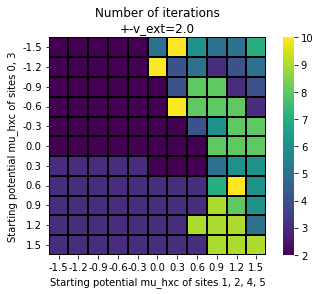

In [86]:
iter_num_exaggerated = np.array(iter_num).copy() + 1
# iter_num_exaggerated[iter_num_exaggerated == 20 ] = np.nan
# plt.imshow(iter_num_exaggerated, cmap='viridis', interpolation='nearest')
# plt.colorbar()
fig, ax = plt.subplots(1,1)
ax.set_facecolor('k')
sns.heatmap(iter_num_exaggerated, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='viridis');
plt.title(f'Number of iterations\n+-v_ext={pmv:.1f}')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

  +0.025   +0.012   -0.003   -0.020   -0.040   -0.860   -0.102   -0.848   -0.102   -0.123   -0.102
  +0.036   +0.025   +0.012   -0.003   -0.020   -0.102   +0.122   +0.030   -0.095   -0.083   -0.104
  +0.045   +0.036   +0.025   +0.012   -0.003   -0.020   +0.117   -0.105   -0.105   -0.102   -0.087
  +0.053   +0.045   +0.036   +0.025   +0.012   -0.003   -0.124   -0.103   -0.102   -0.102   -0.088
  +0.060   +0.053   +0.045   +0.036   +0.025   +0.012   -0.003   +0.124   +0.121   -0.124   -0.124
  +0.066   +0.060   +0.053   +0.045   +0.036   +0.025   +0.012   -0.003   -0.124   -0.123   -0.124
  +0.050   +0.060   +0.054   +0.046   +0.038   +0.036   +0.025   +0.012   +0.084   -0.105   -0.105
  +0.054   +0.046   +0.038   +0.029   +0.019   +0.008   +0.024   +0.013   -0.758   -0.102   -0.123
  +0.061   +0.055   +0.048   +0.040   +0.031   +0.021   +0.011   -0.001   -0.124   -0.105   -0.102
  +0.061   +0.055   +0.048   +0.040   +0.030   +0.020   +0.008   -0.124   -0.124   -0.123   +0.074
  +0.049  

' '

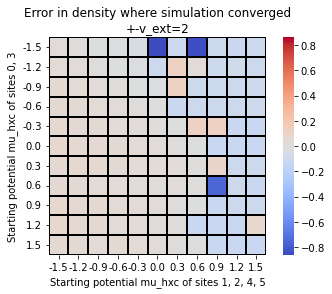

In [87]:
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
fig, ax = plt.subplots(1,1)
ax.set_facecolor('k')
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='coolwarm', norm=mcolors.CenteredNorm());
plt.title(f'Error in density where simulation converged\n+-v_ext={pmv}')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

  +0.025   +0.012   -0.003   -0.020   -0.040   -0.860   -0.102   -0.848   -0.102   -0.123   -0.102
  +0.036   +0.025   +0.012   -0.003   -0.020   -0.102   +0.122   +0.030   -0.095   -0.083   -0.104
  +0.045   +0.036   +0.025   +0.012   -0.003   -0.020   +0.117   -0.105   -0.105   -0.102   -0.087
  +0.053   +0.045   +0.036   +0.025   +0.012   -0.003   -0.124   -0.103   -0.102   -0.102   -0.088
  +0.060   +0.053   +0.045   +0.036   +0.025   +0.012   -0.003   +0.124   +0.121   -0.124   -0.124
  +0.066   +0.060   +0.053   +0.045   +0.036   +0.025   +0.012   -0.003   -0.124   -0.123   -0.124
  +0.050   +0.060   +0.054   +0.046   +0.038   +0.036   +0.025   +0.012   +0.084   -0.105   -0.105
  +0.054   +0.046   +0.038   +0.029   +0.019   +0.008   +0.024   +0.013   -0.758   -0.102   -0.123
  +0.061   +0.055   +0.048   +0.040   +0.031   +0.021   +0.011   -0.001   -0.124   -0.105   -0.102
  +0.061   +0.055   +0.048   +0.040   +0.030   +0.020   +0.008   -0.124   -0.124   -0.123   +0.074
  +0.049  

' '

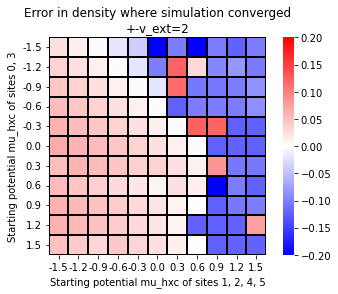

In [88]:
n_ref = np.array(n_ref)
n_array = np.array(n)
diff_array = n_array-n_ref
essentials.print_matrix(n_array-n_ref)
fig, ax = plt.subplots(1,1)
sns.heatmap(diff_array, mask=(iter_num_exaggerated == 20), square=True, linewidths=0.01, linecolor='k', cmap='bwr', norm=mcolors.CenteredNorm(halfrange=0.2));
plt.title(f'Error in density where simulation converged\n+-v_ext={pmv}')
ax.set_facecolor('k')
plt.gca().set_xticks(np.arange(len(x))+0.5)
plt.gca().set_yticks(np.arange(len(x))+0.5)
plt.yticks(rotation= 0)
plt.gca().set_xticklabels([f'{i:.1f}' for i in x])
plt.gca().set_yticklabels([f'{i:.1f}' for i in x])
plt.xlabel('Starting potential mu_hxc of sites 1, 2, 4, 5')
plt.ylabel('Starting potential mu_hxc of sites 0, 3')
' '

## Conclussions
It looks like convergence and error of the algorithm is dependent primarily the **difference** on starting values of $v^{Hxc}$. \
It also looks like I can reduce dimensionality of this problem by only taking starting Hxc potential (-x, x, x, -x, x, x) \
From only 2 examples it looks like that for larger $\Delta v^{ext}$ there is higher optimal difference in starting Hxc chemical potentials.